In [29]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import scipy.stats as stats


In [2]:
df = pd.read_csv('../data/CSPX_feature_engineered.csv', parse_dates=['Date'])
df.head(10)

,Date,Close,High,Low,Open,Volume,MA5,MA20,Return,MA50,Volatility20,Year,Month,Day,Lag1,Lag2,Lag3
0,2019-03-12,274.179993,274.540009,272.829987,273.839996,60269.0,271.404004,272.340501,0.007163,263.605200,0.006188,2019,3,12,272.230011,268.029999,270.040009
1,2019-03-13,276.070007,276.500000,273.779999,273.790009,94606.0,272.110004,272.678001,0.006893,264.228600,0.006306,2019,3,13,274.179993,272.230011,268.029999
2,2019-03-14,275.899994,276.760010,275.190002,276.200012,41365.0,273.282001,273.051001,-0.000616,264.920600,0.006234,2019,3,14,276.070007,274.179993,272.230011
3,2019-03-15,277.480011,277.640015,275.829987,276.089996,70838.0,275.172003,273.363002,0.005727,265.547400,0.005957,2019,3,15,275.899994,276.070007,274.179993
4,2019-03-18,277.279999,278.309998,277.119995,277.320007,33259.0,276.182001,273.619502,-0.000721,266.107800,0.005948,2019,3,18,277.480011,275.899994,276.070007
5,2019-03-19,279.559998,279.929993,278.500000,278.500000,44673.0,277.258002,273.992502,0.008223,266.709400,0.006157,2019,3,19,277.279999,277.480011,275.899994
6,2019-03-20,276.290009,278.399994,276.290009,278.140015,35533.0,277.302002,274.170502,-0.011697,267.177201,0.006806,2019,3,20,279.559998,277.279999,277.480011
7,2019-03-21,279.119995,279.880005,275.820007,276.010010,30320.0,277.946002,274.526501,0.010243,267.698200,0.007080,2019,3,21,276.290009,279.559998,277.279999
8,2019-03-22,275.989990,280.500000,275.350006,280.459991,76468.0,277.647998,274.641000,-0.011214,268.153200,0.007503,2019,3,22,279.119995,276.290009,279.559998
9,2019-03-25,274.579987,275.769989,273.619995,274.250000,78467.0,277.107996,274.594000,-0.005109,268.590600,0.007452,2019,3,25,275.989990,279.119995,276.290009


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1465 non-null   datetime64[ns]
 1   Close         1465 non-null   float64       
 2   High          1465 non-null   float64       
 3   Low           1465 non-null   float64       
 4   Open          1465 non-null   float64       
 5   Volume        1465 non-null   float64       
 6   MA5           1465 non-null   float64       
 7   MA20          1465 non-null   float64       
 8   Return        1465 non-null   float64       
 9   MA50          1465 non-null   float64       
 10  Volatility20  1465 non-null   float64       
 11  Year          1465 non-null   int64         
 12  Month         1465 non-null   int64         
 13  Day           1465 non-null   int64         
 14  Lag1          1465 non-null   float64       
 15  Lag2          1465 non-null   float64 

In [3]:
X = df.drop(columns=['Close', 'Date'])
y = df['Close']

In [4]:
train_size = int(len(df) * 0.8)
train_size

1172

In [5]:
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Train the model
- use XGBoost (for feature importance), or any baseline model.

# n_estimators=100
- Meaning: Number of trees in the ensemble.

# Why 100?
- More trees → model can capture more complexity, but also slower and higher risk of overfitting.
- For a small CPU-friendly project, 100 is a balanced starting point.

# max_depth=3
- Meaning: Maximum depth of each tree.

# Why 3?
- Shallow trees prevent overfitting, especially on small datasets like CSPX (~1500 rows).
- Depth 3 captures interactions without memorizing the training set.

# Tuning:
- Larger depth → model is more powerful but slower and overfits easily.
- Smaller depth → may underfit.


# tree_method='hist'
- Meaning: XGBoost uses histogram-based algorithm to build trees.

# Why 'hist'?
- Much faster on CPU than the default exact greedy method.
- Uses binned data internally → efficient for medium to large datasets.

In [32]:
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, tree_method='hist', random_state=42)

In [7]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [9]:
# Get feature importance from XGBoost
importance = model.feature_importances_
feature_names = X_train.columns

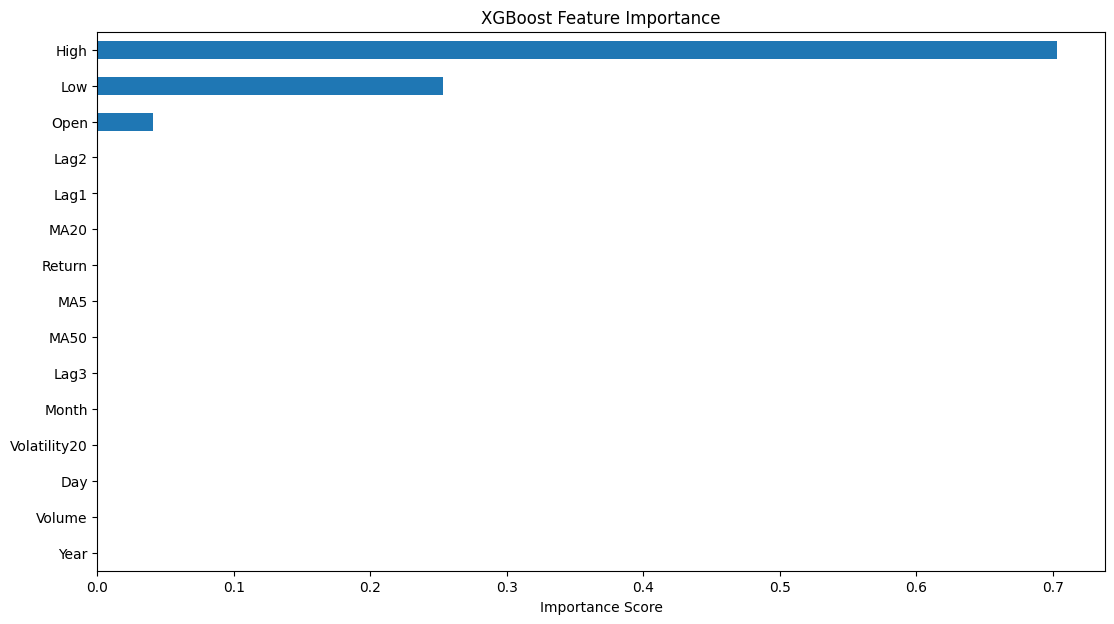

In [20]:
# Convert to Series for easier plotting
importance_series = pd.Series(importance, index=feature_names)
importance_series.sort_values().plot(kind='barh', figsize=(13,7), title='XGBoost Feature Importance')
plt.xlabel("Importance Score")
plt.show()

In [12]:
xgb_preds = model.predict(X_test)

In [14]:
xgb_preds[:10]

array([449.22244, 456.94727, 455.7911 , 457.0384 , 455.52505, 459.98993,
       454.96088, 461.47583, 467.6353 , 470.9844 ], dtype=float32)

In [15]:
residuals = y_test - xgb_preds

# Residuals vs Predicted Scatter Plot
- Checks if residuals are randomly scattered around 0.
- Good fit → random scatter.
- Bad fit → patterns (curves, funnel shape).

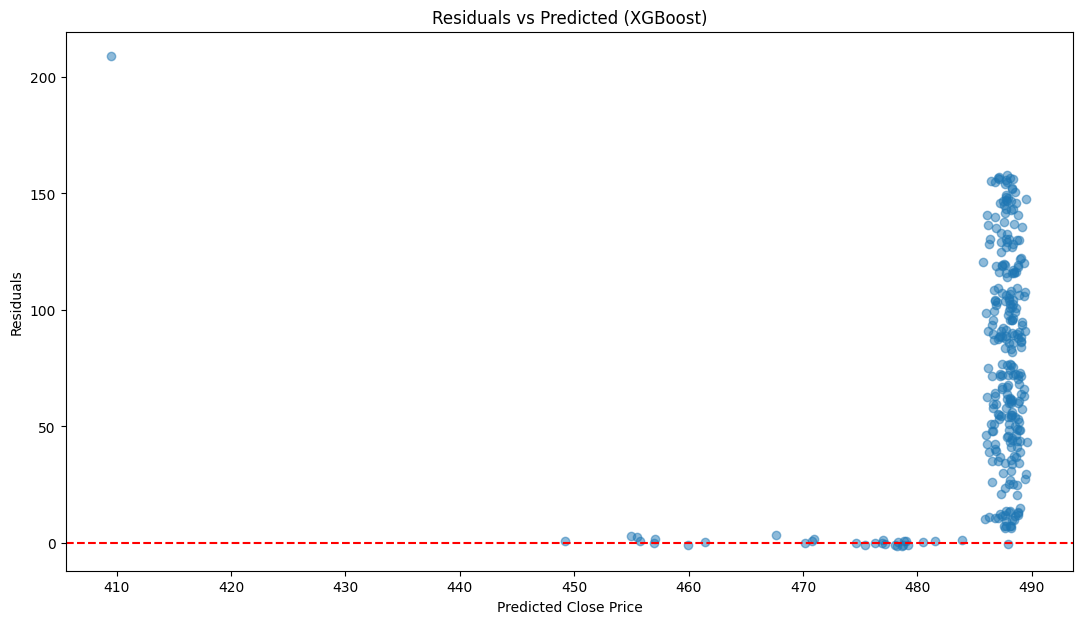

In [19]:
plt.figure(figsize=(13,7))
plt.scatter(xgb_preds, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Close Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (XGBoost)")
plt.show()

# Histogram of Residuals
- Check distribution: ideally centered at 0 and symmetric.

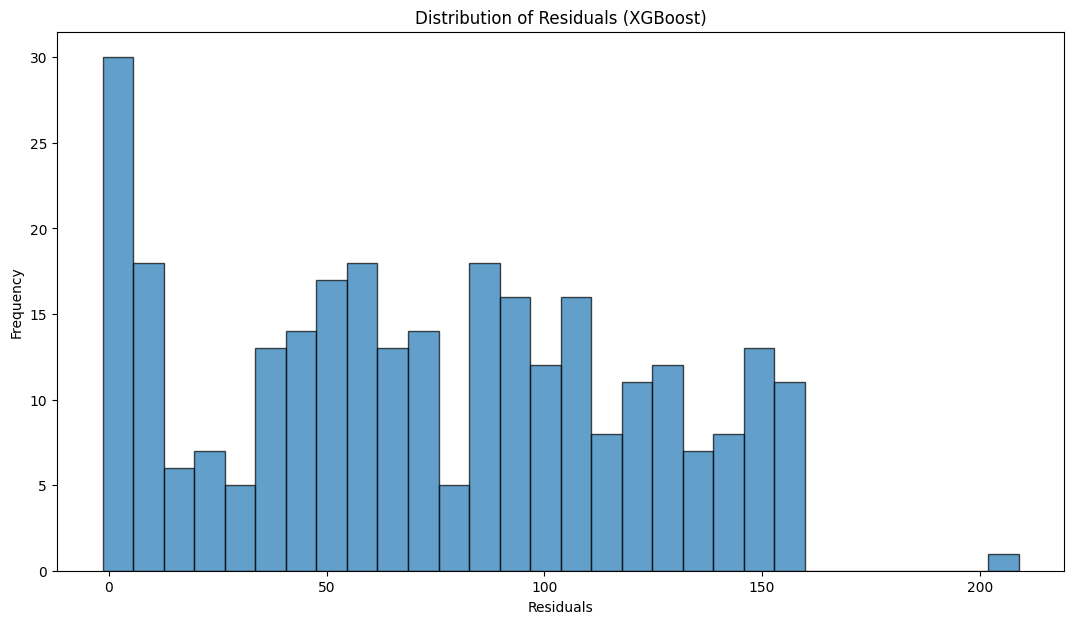

In [18]:
plt.figure(figsize=(13,7))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (XGBoost)")
plt.show()

# Residuals Over Time
- See if residuals cluster in certain periods (e.g., COVID crash).
- Random → good.
- Long streaks above/below 0 → missing trend.

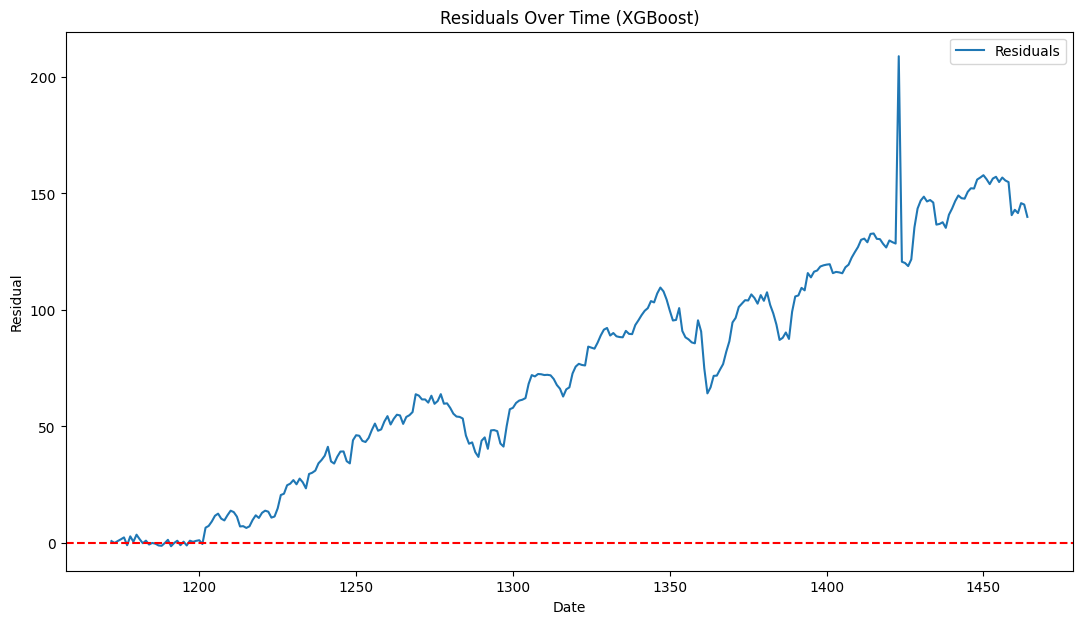

In [25]:
plt.figure(figsize=(13,7))
plt.plot(y_test.index, residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Residual")
plt.title("Residuals Over Time (XGBoost)")
plt.legend()
plt.show()

# Q-Q Plot
- Check if residuals are normally distributed (assumption of many regressions).

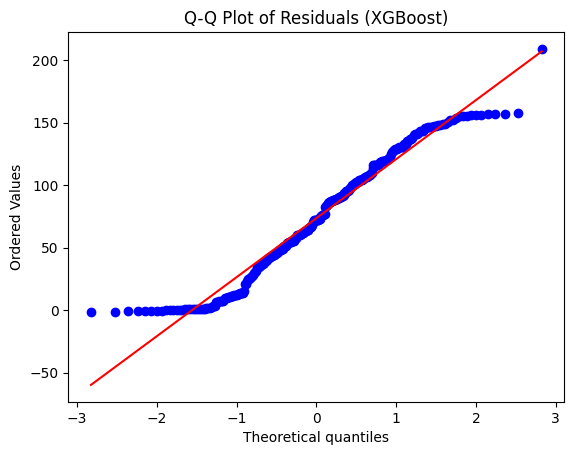

In [27]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (XGBoost)")
plt.show()

# RMSE = 87 → On average, predictions are off by ~87 points.
# MAE = 73 → On average, absolute error is ~73 points.
# R² = -2 → Negative means the model is worse than just predicting the mean value every time.

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
mae = mean_absolute_error(y_test, xgb_preds)
r2 = r2_score(y_test, xgb_preds)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 87.66094567852969
MAE: 73.58797780320099
R²: -2.0753052416297764


# conclusion very bad model